## Load Modules

In [1]:
from DataLoading import loadOnlyGeneratedTrain, loadOnlyOriginalTrain, loadOriginalAndGeneratedTrain, loadTest
from DetailsDisplayer import detailsDisplayer
import torch
from Evaluation import evaluate

## General Properties

In [2]:
no_path = 'C:/Projects/Big-Files/cleaned_brain_tumor_dataset/no'
yes_path = 'C:/Projects/Big-Files/cleaned_brain_tumor_dataset/yes'
IMAGE_SIZE = 256
NEED_PRE_PROCESS = False
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cuda


## Load Data

### Load Train Data

In [3]:
# Options:
# 1: Load only the original training samples
# train_folder_path = "C:/Projects/Big-Files/brain_tumor_dataset/train/original"
# 2: Load only the generated training samples
# train_folder_path = "C:/Projects/Big-Files/brain_tumor_dataset/train/generated"
# 3: Load both the original and generated training samples
trainOption = 2

if trainOption == 1:
    train_loader = loadOnlyOriginalTrain()
elif trainOption == 2:
    train_loader = loadOnlyGeneratedTrain()
elif trainOption == 3:
    train_loader = loadOriginalAndGeneratedTrain()
else:
    print("Invalid choice")
    exit(0)

detailsDisplayer(train_loader)

Batch Size: 16
Number of Batches: 12
Total Samples: 189
Samples per class:
Class 0: 73 samples
Class 1: 116 samples

Batch images shape: torch.Size([16, 1, 256, 256])
Batch labels: tensor([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])


### Load Test Data

In [4]:
test_loader = loadTest()
detailsDisplayer(test_loader)

Batch Size: 16
Number of Batches: 4
Total Samples: 64
Samples per class:
Class 0: 25 samples
Class 1: 39 samples

Batch images shape: torch.Size([16, 1, 256, 256])
Batch labels: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


## Classify

c:\Projects\Brain_Tumor\.venv\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\Projects\Brain_Tumor\.venv\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch [1/30], Train Loss: 0.7056, Test Loss: 0.6770
Epoch [2/30], Train Loss: 0.6736, Test Loss: 0.6705
Epoch [3/30], Train Loss: 0.6646, Test Loss: 0.6676
Epoch [4/30], Train Loss: 0.6623, Test Loss: 0.6667
Epoch [5/30], Train Loss: 0.6593, Test Loss: 0.6653
Epoch [6/30], Train Loss: 0.6480, Test Loss: 0.6697
Epoch [7/30], Train Loss: 0.6402, Test Loss: 0.6625
Epoch [8/30], Train Loss: 0.6103, Test Loss: 0.6563
Epoch [9/30], Train Loss: 0.5957, Test Loss: 0.6604
Epoch [10/30], Train Loss: 0.5778, Test Loss: 0.6482
Epoch [11/30], Train Loss: 0.5740, Test Loss: 0.6528
Epoch [12/30], Train Loss: 0.5854, Test Loss: 0.6546
Epoch [13/30], Train Loss: 0.5663, Test Loss: 0.6604
Epoch [14/30], Train Loss: 0.5768, Test Loss: 0.6566
Epoch [15/30], Train Loss: 0.5546, Test Loss: 0.6561
Epoch [16/30], Train Loss: 0.5470, Test Loss: 0.6743
Epoch [17/30], Train Loss: 0.5426, Test Loss: 0.6700
Epoch [18/30], Train Loss: 0.5319, Test Loss: 0.6754
Epoch [19/30], Train Loss: 0.5209, Test Loss: 0.6667
Ep

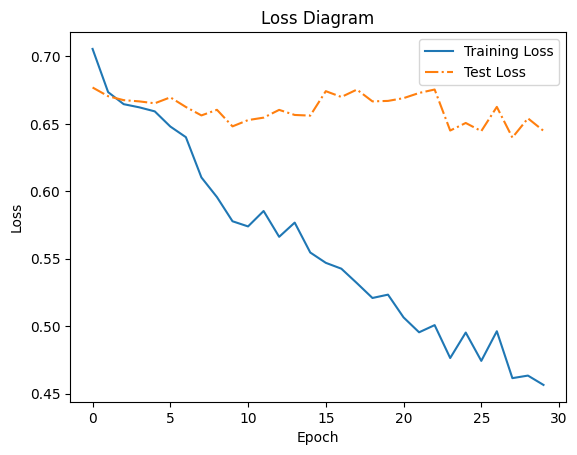

Total Test Accuracy: 59%
Class 0 Test Accuracy: 28%
Class 1 Test Accuracy: 79%


In [5]:
evaluate(train_loader, test_loader, device)